In [1]:
import seaborn as sns
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Pandas: 1.3.4
Numpy: 1.20.3
Sklearn: 1.1.2
Matplotlib: 3.4.3
Keras: 2.8.0


In [2]:
# read the csv file
data = pd.read_csv('ecgdataset.csv')

In [3]:
data.columns = ['age','sex','smoker','years_of_smoking','LDL_cholesterol','chest_pain_type','height','weight', 'familyhist',
                'activity', 'lifestyle', 'ischemic_heart_disease', 'heart_rate', 'diabets', 'blood_pressure_sys', 'blood_pressure_dias', 
                 'hypertention', 'Interventricular_septal_end_diastole', 'ecg_pattern', 'Q_wave', 'target']

In [4]:
data.head()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,ischemic_heart_disease,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1


In [5]:
data.describe()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,ischemic_heart_disease,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,55.117117,0.534535,0.195195,4.798799,112.926246,2.885886,162.102102,82.157357,0.237237,0.369369,...,0.255255,83.882883,0.231231,123.618619,74.879880,0.516517,0.282282,3.315315,0.078078,0.354354
std,14.159210,0.499557,0.396947,11.249835,37.972983,1.032110,11.295127,15.392197,0.426029,0.483360,...,0.436661,14.633107,0.422254,21.341639,12.681834,0.500479,0.450787,0.981596,0.268698,0.479037
min,20.000000,0.000000,0.000000,0.000000,26.000000,1.000000,128.000000,41.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000,80.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,86.200000,2.000000,153.000000,72.000000,0.000000,0.000000,...,0.000000,74.000000,0.000000,110.000000,70.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,110.000000,3.000000,162.000000,81.000000,0.000000,0.000000,...,0.000000,84.000000,0.000000,120.000000,70.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,137.000000,4.000000,171.000000,90.300000,0.000000,1.000000,...,1.000000,91.000000,0.000000,135.000000,80.000000,1.000000,1.000000,4.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,50.000000,260.000000,4.000000,192.000000,134.000000,1.000000,1.000000,...,1.000000,140.000000,1.000000,220.000000,140.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [6]:
data.tail()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,ischemic_heart_disease,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0
332,68,1,0,0,92.0,2,165,80.0,1,0,...,0,68,0,115,75,1,0,4,0,0


In [7]:
# Total Percentage of Missing Data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


C:\Users\SATWIK~1\AppData\Local\Temp/ipykernel_12412/1015230891.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax = ax)


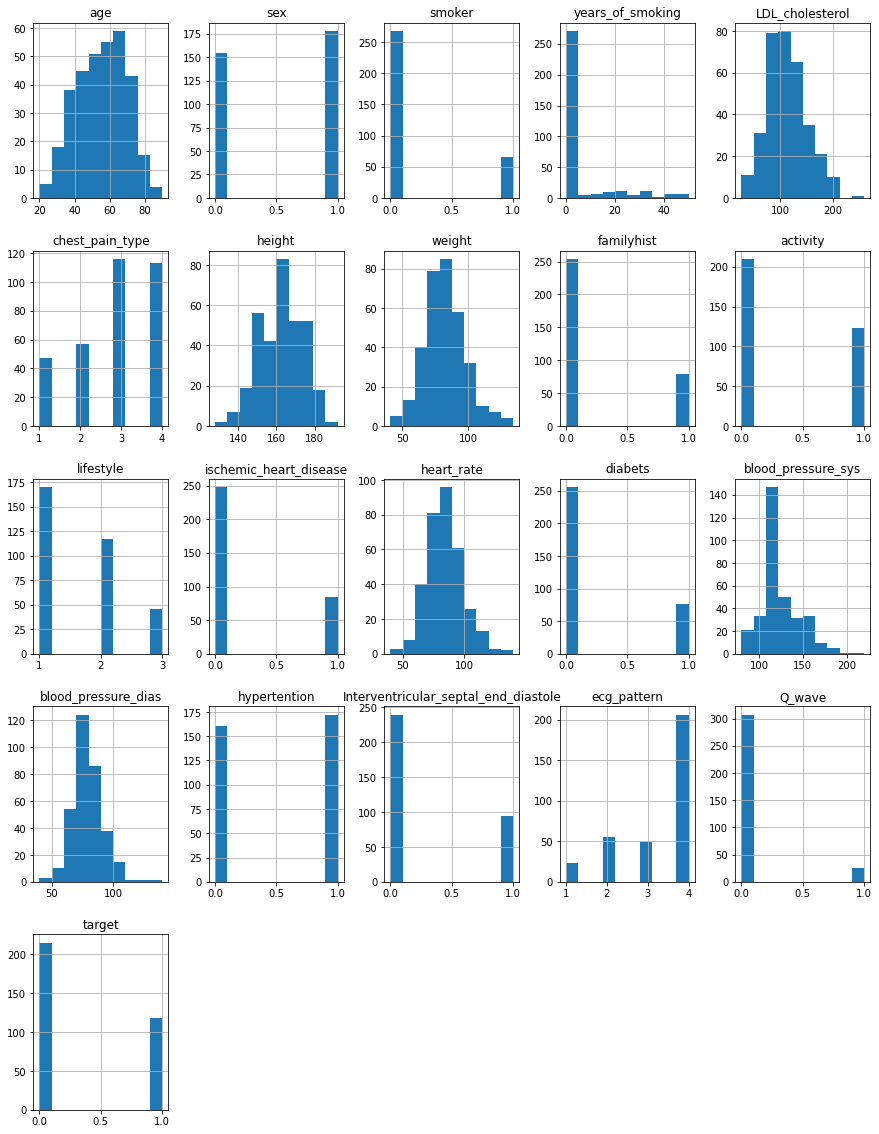

In [8]:
# Plot Histogram to See the Distribution of the Data

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

C:\Users\SATWIK~1\AppData\Local\Temp/ipykernel_12412/347685648.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset_copy.hist(ax = ax)


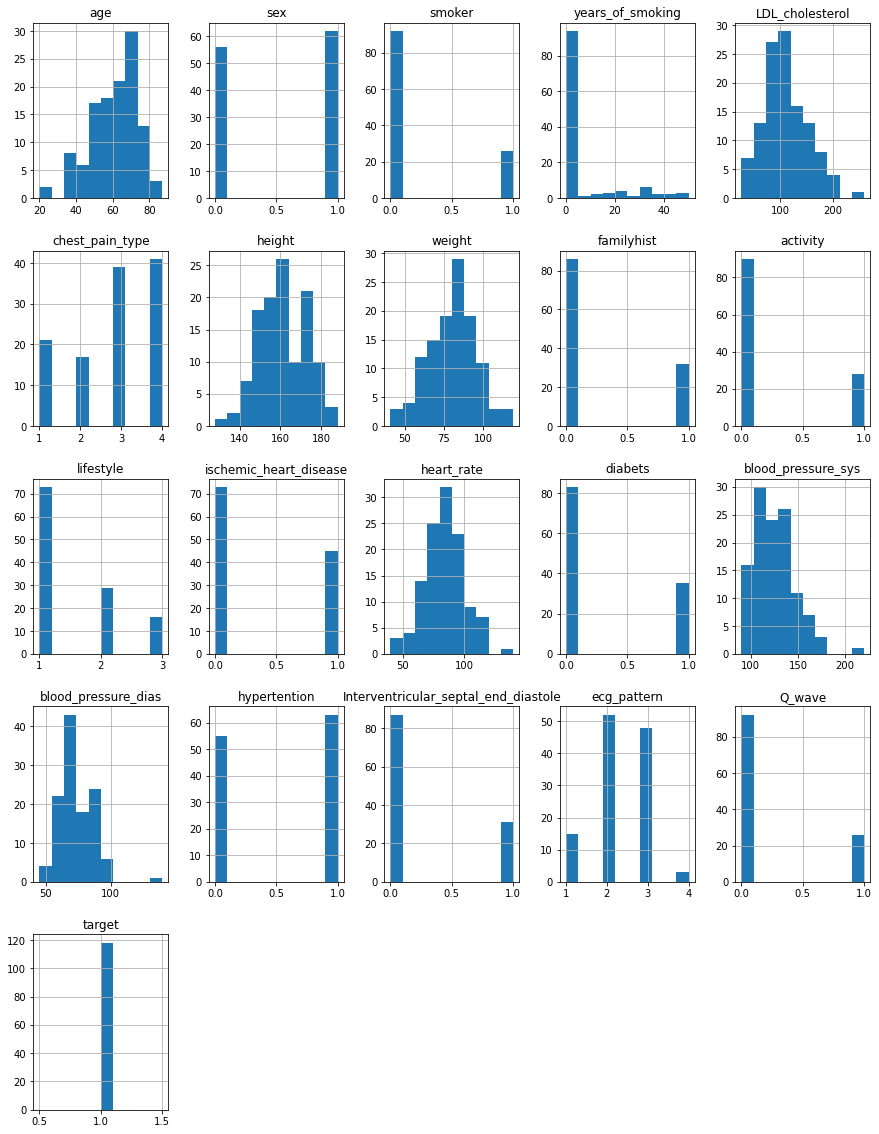

In [9]:
# Plot Histogram to See the Distribution of the Data for Heart Disease Cases
dataset_copy=data[data['target']==1]
columns=data.columns[:21]
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset_copy.hist(ax = ax)
plt.show()

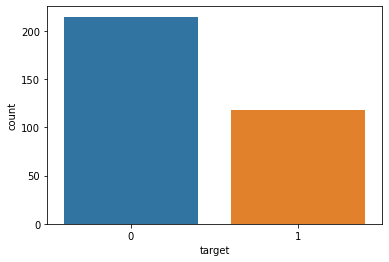

In [10]:
sns.countplot(x='target',data=data)
plt.show()

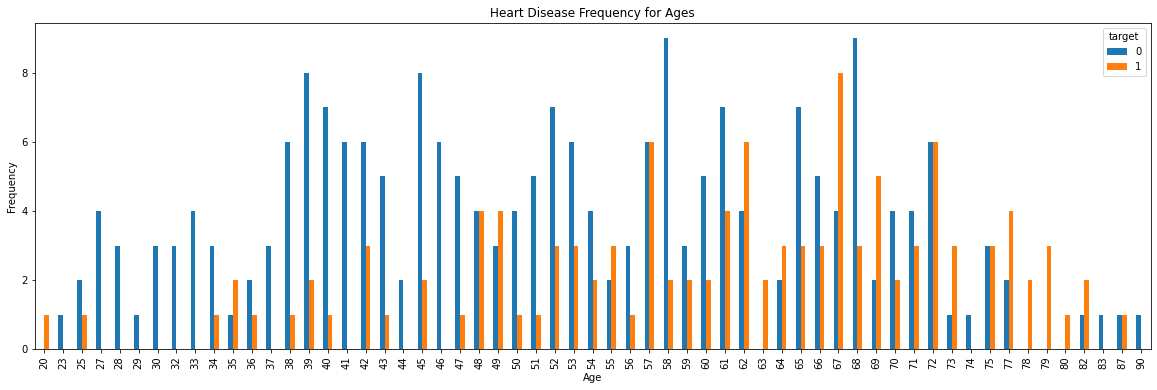

In [11]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

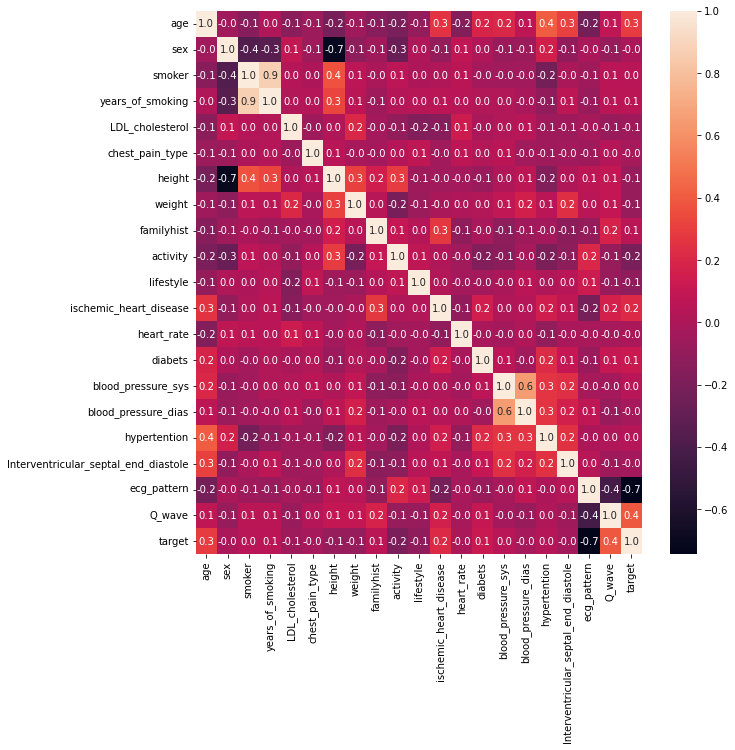

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [13]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

C:\Users\SATWIK~1\AppData\Local\Temp/ipykernel_12412/1844786348.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['target'], 1))


In [14]:
X[0]

array([ 65.,   0.,   0.,   0.,  69.,   4., 168., 111.,   1.,   0.,   1.,
         1.,  98.,   1., 120.,  80.,   1.,   0.,   4.,   0.])

In [15]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

In [17]:
# convert the data to categorical labels

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(266, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [18]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15)

In [19]:
model = Sequential()
model.add(Dense(64, input_dim=20, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(32, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(8, activation='softmax'))
model.add(Dropout(0.20))         
model.add(Dense(2, activation='sigmoid'))
    
# compile model
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

C:\Users\Satwika Balivada\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
# fit the model to the test data
history=model.fit(X_test, Y_test, validation_data=(X_test, Y_test),epochs=26, batch_size=10, callbacks=[es])

acc = model.evaluate(X_test, Y_test)
print(f"Loss:      {round(acc[0]*100,2)}%\n")
print(f"Accuracy:  {round(acc[1]*100,2)}%\n")

Epoch 1/26
7/7 [==============================] - 3s 69ms/step - loss: 0.7224 - accuracy: 0.5672 - val_loss: 0.7100 - val_accuracy: 0.5672
Epoch 2/26
7/7 [==============================] - 0s 7ms/step - loss: 0.7183 - accuracy: 0.5821 - val_loss: 0.7071 - val_accuracy: 0.5672
Epoch 3/26
7/7 [==============================] - 0s 8ms/step - loss: 0.6998 - accuracy: 0.5970 - val_loss: 0.7043 - val_accuracy: 0.5672
Epoch 4/26
7/7 [==============================] - 0s 7ms/step - loss: 0.7174 - accuracy: 0.5672 - val_loss: 0.7012 - val_accuracy: 0.5672
Epoch 5/26
7/7 [==============================] - 0s 8ms/step - loss: 0.6922 - accuracy: 0.5522 - val_loss: 0.6970 - val_accuracy: 0.5672
Epoch 6/26
7/7 [==============================] - 0s 7ms/step - loss: 0.6974 - accuracy: 0.5672 - val_loss: 0.6925 - val_accuracy: 0.5672
Epoch 7/26
7/7 [==============================] - 0s 9ms/step - loss: 0.7018 - accuracy: 0.5672 - val_loss: 0.6867 - val_accuracy: 0.5672
Epoch 8/26
7/7 [=================

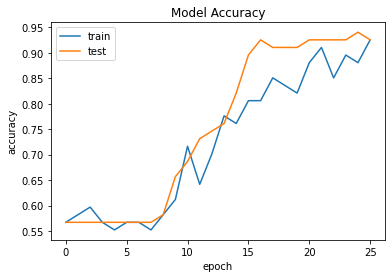

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

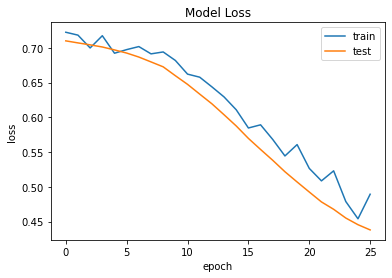

In [22]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [23]:
# generate classification report using predictions for categorical model

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.9253731343283582
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        38
           1       0.88      0.97      0.92        29

    accuracy                           0.93        67
   macro avg       0.92      0.93      0.92        67
weighted avg       0.93      0.93      0.93        67



In [25]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

INFO:tensorflow:Assets written to: ram://58f97a5e-4932-4708-9588-7839b1853bd6/assets


In [28]:
from tensorflow.keras.models import load_model
model.save('mainann.h5')

In [30]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('mainann.h5')

In [31]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://efe93387-2c47-40ab-a85a-191dbfc808c9/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

In [24]:
import pickle
# open a file, where you ant to store the data
file = open('annmodel.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://a847eea5-95f1-45ce-8a4a-664a4ff6ff09/assets
